# Setting-up environment

In [1]:
!git clone https://github.com/MaurizioFD/RecSys_Course_AT_PoliMi

Cloning into 'RecSys_Course_AT_PoliMi'...
remote: Enumerating objects: 1499, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1499 (delta 113), reused 231 (delta 100), pack-reused 1255
Receiving objects: 100% (1499/1499), 50.98 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (844/844), done.


In [2]:
!mv RecSys_Course_AT_PoliMi/* /kaggle/working/

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 43.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 36.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 12.5 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.7/776.7 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 48.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497

In [4]:
!python run_compile_all_cython.py

run_compile_all_cython: Found 10 Cython files in 4 folders...
run_compile_all_cython: All files will be compiled using your current python environment: '/opt/conda/bin/python'
Compiling [1/10]: MatrixFactorizationImpressions_Cython_Epoch.pyx... 
In file included from /opt/conda/lib/python3.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969,
                 from /opt/conda/lib/python3.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /opt/conda/lib/python3.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from MatrixFactorizationImpressions_Cython_Epoch.c:612:
/opt/conda/lib/python3.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
MatrixFactorizationImpressions_Cython_Epoch.c: In function ‘__

# Imports

In [5]:
!pip install lightfm tqdm optuna ipykernel matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 27.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.
woodwork 0.16.4 requires pandas<1.4.2,>=1.3.0, but you have pandas 1.2.4 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.3 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
mlxtend 0.21.0 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.1 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.1 whi

In [6]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
import scipy.sparse as sps
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from lightfm import LightFM
from lightfm.evaluation import auc_score, precision_at_k
import time
import optuna

In [40]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Recommenders.Similarity.Compute_Similarity_Python import Compute_Similarity_Python
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.NonPersonalizedRecommender import TopPop
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.BaseRecommender import BaseRecommender
from Evaluation.Evaluator import EvaluatorHoldout
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.KNN.ItemKNNCustomSimilarityRecommender import ItemKNNCustomSimilarityRecommender
#----remove

In [8]:
seed = 69
np.random.seed(seed)

# Preprocessing

In [9]:
# Import training data
URM_path = "../input/data-books/data_train.csv"
URM_all_dataframe = pd.read_csv(filepath_or_buffer=URM_path,
                                header=0,
                                dtype={0:int, 1:int, 2:int},
                                engine='python')

URM_all_dataframe.columns = ["user_id", "item_id", "interaction"]

In [10]:
# Import target users
target_path = "../input/data-books/data_target_users_test.csv"
target_dataframe= pd.read_csv(filepath_or_buffer=target_path,
                                header=0,
                                dtype={0:int},
                                engine='python')
target_dataframe.columns = ["user_id"]
target_dataframe

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
10877,13020
10878,13021
10879,13022
10880,13023


In [11]:
def preprocess_data(ratings: pd.DataFrame):
    unique_users = ratings.user_id.unique()
    unique_items = ratings.item_id.unique()

    num_users, min_user_id, max_user_id = unique_users.size, unique_users.min(), unique_users.max()
    num_items, min_item_id, max_item_id = unique_items.size, unique_items.min(), unique_items.max()

    print(num_users, min_user_id, max_user_id)
    print(num_items, min_item_id, max_item_id)

    mapping_user_id = pd.DataFrame({"mapped_user_id": np.arange(num_users), "user_id": unique_users})
    mapping_item_id = pd.DataFrame({"mapped_item_id": np.arange(num_items), "item_id": unique_items})

    ratings = pd.merge(left=ratings,
                       right=mapping_user_id,
                       how="inner",
                       on="user_id")

    ratings = pd.merge(left=ratings,
                       right=mapping_item_id,
                       how="inner",
                       on="item_id")

    return ratings

In [12]:
# Call preprocess data function
ratings = preprocess_data(URM_all_dataframe)

12638 1 13024
22222 1 22347


## From DF to Sparse matrix

In [13]:
URM = sps.coo_matrix((ratings.interaction.values, (ratings.mapped_user_id.values, ratings.mapped_item_id.values)))

## Data Splitting

In [14]:
urm_train, urm_test = split_train_in_two_percentage_global_sample(URM, train_percentage = 0.80)
urm_train, urm_validation = split_train_in_two_percentage_global_sample(urm_train, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(urm_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(urm_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 2630 (20.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 2127 (16.8%) Users that have less than 1 test interactions


# Model

In [64]:
class ScoresHybridRecommender(BaseRecommender):
    """ ScoresHybridRecommender
    Hybrid of two prediction scores R = R1*alpha + R2*(1-alpha)

    """

    RECOMMENDER_NAME = "ScoresHybridRecommender"

    def __init__(self, URM_train, recommender_1, recommender_2):
        super(ScoresHybridRecommender, self).__init__(URM_train)

        self.URM_train = sps.csr_matrix(URM_train)
        self.recommender_1 = recommender_1
        self.recommender_2 = recommender_2


    def fit(self, alpha=0.5):
        self.alpha = alpha

    def _compute_item_score(self, user_id_array, items_to_compute):

        # In a simple extension this could be a loop over a list of pretrained recommender objects
        item_weights_1 = self.recommender_1._compute_item_score(user_id_array)
        item_weights_2 = self.recommender_2._compute_item_score(user_id_array)

        item_weights = item_weights_1*self.alpha + item_weights_2*(1-self.alpha)

        return item_weights

# Hyperparameter Tuning

In [16]:
class SaveResults(object):

    def __init__(self):
        self.results_df = pd.DataFrame(columns=["result"])

    def __call__(self, optuna_study, optuna_trial):
        hyperparam_dict = optuna_trial.params.copy()
        hyperparam_dict["result"] = optuna_trial.values[0]

        # Create a DataFrame from the current trial's results
        trial_df = pd.DataFrame([hyperparam_dict])

        # Use concat instead of append
        self.results_df = pd.concat([self.results_df, trial_df], ignore_index=True)

## ItemKNNCF Tuning

In [17]:
import os
os.chdir('/kaggle/working/')

In [18]:
from Recommenders.Similarity.Cython.Compute_Similarity_Cython import Compute_Similarity_Cython

In [22]:
hyperparameter_search_rnd = pd.DataFrame(columns = ["k", "MAP"])
hyperparameter_search_rnd["k"] = loguniform.rvs(10, 1000, size=11).astype(int) # Generate a list of k's following a loguniform distribution to search for the best performing value
hyperparameter_search_rnd = hyperparameter_search_rnd.sort_values(by="k") # Sort the values to test incrementally

for index in hyperparameter_search_rnd.index: # Loop over k values

    recommender = ItemKNNCFRecommender(urm_train)
    recommender.fit(shrink=0.0, topK=hyperparameter_search_rnd.loc[index,"k"]) # Fit with collected k value

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    hyperparameter_search_rnd.loc[index,"MAP"] = result_df.loc[10]["MAP"] # Save MAP evaluation result in the dataframe, for later plotting

ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4698.87 column/sec. Elapsed time 4.73 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.22 sec. Users per second: 1218
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4643.88 column/sec. Elapsed time 4.79 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.34 sec. Users per second: 1200
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4715.54 column/sec. Elapsed time 4.71 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.52 sec. Users per second: 1175
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFR

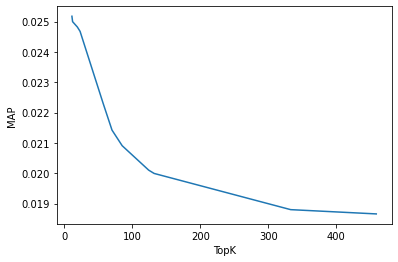

In [23]:
pyplot.plot(hyperparameter_search_rnd["k"].values, hyperparameter_search_rnd["MAP"].values) # Plot MAP/K graph
pyplot.ylabel('MAP')
pyplot.xlabel('TopK')
pyplot.show()

In [24]:
item_cf_best_k_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]

In [25]:
# Same procedure but with the shrink value
hyperparameter_search_rnd = pd.DataFrame(columns = ["k", "shrink", "MAP"])
hyperparameter_search_rnd["shrink"] = loguniform.rvs(0.1, 1000, size=11).astype(int)
hyperparameter_search_rnd = hyperparameter_search_rnd.sort_values(by="shrink")
hyperparameter_search_rnd["k"] = item_cf_best_k_value["k"]

for index in hyperparameter_search_rnd.index:

    recommender = ItemKNNCFRecommender(urm_train)
    recommender.fit(shrink=hyperparameter_search_rnd.loc[index,"shrink"],
                    topK=hyperparameter_search_rnd.loc[index,"k"])

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    hyperparameter_search_rnd.loc[index, "MAP"] = result_df.loc[10]["MAP"]

ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4645.36 column/sec. Elapsed time 4.78 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.42 sec. Users per second: 1188
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4641.08 column/sec. Elapsed time 4.79 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.31 sec. Users per second: 1205
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4694.29 column/sec. Elapsed time 4.73 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.31 sec. Users per second: 1204
ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFR

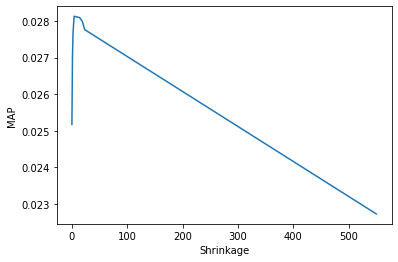

In [26]:
pyplot.plot(hyperparameter_search_rnd["shrink"].values, hyperparameter_search_rnd["MAP"].values)
pyplot.ylabel('MAP')
pyplot.xlabel('Shrinkage')
pyplot.show()

In [27]:
item_cf_best_k_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]['k']
item_cf_best_k_value

11

In [28]:
item_cf_best_shrink_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]['shrink']
item_cf_best_shrink_value

4

## RP3Beta

In [31]:
#alpha=1., beta=0.6, min_rating=0, topK=100, implicit=False, normalize_similarity=True
def objective_function_rp3beta(optuna_trial):

    recommender_instance = RP3betaRecommender(urm_train)
    recommender_instance.fit(
                             beta = optuna_trial.suggest_float("beta", 0.3, 0.65),
                             topK = optuna_trial.suggest_int("topK", 80, 140),
                             implicit=True,
                             normalize_similarity = optuna_trial.suggest_categorical("normalize_similarity", [True, False]),
                            )

    result_df, _ = evaluator_validation.evaluateRecommender(recommender_instance)

    return result_df.loc[10]["MAP"]

In [32]:
optuna_study_rp3beta = optuna.create_study(direction="maximize")

save_results_rp3beta = SaveResults()

optuna_study_rp3beta.optimize(objective_function_rp3beta,
                      callbacks=[save_results_rp3beta],
                      n_trials = 20)

[I 2023-11-30 14:45:44,476] A new study created in memory with name: no-name-0bfecc04-04a3-4843-a361-cdd351dd1f69


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1831.96 column/sec. Elapsed time 12.13 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.17 sec. Users per second: 1091


[I 2023-11-30 14:46:10,756] Trial 0 finished with value: 0.006310745054749851 and parameters: {'beta': 0.31574418198102516, 'topK': 103, 'normalize_similarity': False}. Best is trial 0 with value: 0.006310745054749851.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1653.52 column/sec. Elapsed time 13.44 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.97 sec. Users per second: 1116


[I 2023-11-30 14:46:39,177] Trial 1 finished with value: 0.022201306415185355 and parameters: {'beta': 0.33685327901078443, 'topK': 127, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1578.58 column/sec. Elapsed time 14.08 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 17.86 sec. Users per second: 560


[I 2023-11-30 14:47:19,326] Trial 2 finished with value: 0.00925289926788728 and parameters: {'beta': 0.59460342713999, 'topK': 136, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1747.41 column/sec. Elapsed time 12.72 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.66 sec. Users per second: 1036


[I 2023-11-30 14:47:46,684] Trial 3 finished with value: 0.004331221530711955 and parameters: {'beta': 0.4920736514655447, 'topK': 91, 'normalize_similarity': False}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1669.01 column/sec. Elapsed time 13.31 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.64 sec. Users per second: 1038


[I 2023-11-30 14:48:16,470] Trial 4 finished with value: 0.0034988675726085926 and parameters: {'beta': 0.6117100664772752, 'topK': 126, 'normalize_similarity': False}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1619.02 column/sec. Elapsed time 13.73 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.99 sec. Users per second: 1002


[I 2023-11-30 14:48:47,227] Trial 5 finished with value: 0.011995954823442805 and parameters: {'beta': 0.5539450294511704, 'topK': 135, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1951.33 column/sec. Elapsed time 11.39 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.57 sec. Users per second: 1046


[I 2023-11-30 14:49:13,324] Trial 6 finished with value: 0.01614983806605506 and parameters: {'beta': 0.49266731213631054, 'topK': 93, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1623.31 column/sec. Elapsed time 13.69 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.88 sec. Users per second: 1013


[I 2023-11-30 14:49:43,871] Trial 7 finished with value: 0.009578484038166305 and parameters: {'beta': 0.5905100883840748, 'topK': 130, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1690.80 column/sec. Elapsed time 13.14 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.76 sec. Users per second: 1026


[I 2023-11-30 14:50:13,312] Trial 8 finished with value: 0.00917195212084302 and parameters: {'beta': 0.5969139533773096, 'topK': 119, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1627.77 column/sec. Elapsed time 13.65 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.11 sec. Users per second: 1099


[I 2023-11-30 14:50:42,111] Trial 9 finished with value: 0.021582107330009023 and parameters: {'beta': 0.35870595802689176, 'topK': 127, 'normalize_similarity': True}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1745.53 column/sec. Elapsed time 12.73 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.30 sec. Users per second: 1077


[I 2023-11-30 14:51:09,722] Trial 10 finished with value: 0.005343625892936448 and parameters: {'beta': 0.40420136302477905, 'topK': 110, 'normalize_similarity': False}. Best is trial 1 with value: 0.022201306415185355.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1706.28 column/sec. Elapsed time 13.02 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.53 sec. Users per second: 1050


[I 2023-11-30 14:51:37,901] Trial 11 finished with value: 0.023139769930087706 and parameters: {'beta': 0.30104305036039913, 'topK': 120, 'normalize_similarity': True}. Best is trial 11 with value: 0.023139769930087706.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1669.37 column/sec. Elapsed time 13.31 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.58 sec. Users per second: 1044


[I 2023-11-30 14:52:06,820] Trial 12 finished with value: 0.022994505189499262 and parameters: {'beta': 0.308396603076521, 'topK': 117, 'normalize_similarity': True}. Best is trial 11 with value: 0.023139769930087706.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1751.29 column/sec. Elapsed time 12.69 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.66 sec. Users per second: 1036


[I 2023-11-30 14:52:34,994] Trial 13 finished with value: 0.020040205930493736 and parameters: {'beta': 0.4087784364643959, 'topK': 111, 'normalize_similarity': True}. Best is trial 11 with value: 0.023139769930087706.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1684.56 column/sec. Elapsed time 13.19 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.70 sec. Users per second: 1032


[I 2023-11-30 14:53:03,682] Trial 14 finished with value: 0.02069650232195202 and parameters: {'beta': 0.3910286002197572, 'topK': 117, 'normalize_similarity': True}. Best is trial 11 with value: 0.023139769930087706.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1837.27 column/sec. Elapsed time 12.10 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.65 sec. Users per second: 1037


[I 2023-11-30 14:53:30,912] Trial 15 finished with value: 0.01883348083438011 and parameters: {'beta': 0.43967551507283315, 'topK': 104, 'normalize_similarity': True}. Best is trial 11 with value: 0.023139769930087706.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 2114.02 column/sec. Elapsed time 10.51 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.25 sec. Users per second: 1082


[I 2023-11-30 14:53:54,708] Trial 16 finished with value: 0.023145336905079163 and parameters: {'beta': 0.30002883785816453, 'topK': 81, 'normalize_similarity': True}. Best is trial 16 with value: 0.023145336905079163.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 2072.57 column/sec. Elapsed time 10.72 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.46 sec. Users per second: 1058


[I 2023-11-30 14:54:19,321] Trial 17 finished with value: 0.02166947790973575 and parameters: {'beta': 0.3612998091695362, 'topK': 82, 'normalize_similarity': True}. Best is trial 16 with value: 0.023145336905079163.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 2003.64 column/sec. Elapsed time 11.09 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.02 sec. Users per second: 1109


[I 2023-11-30 14:54:43,558] Trial 18 finished with value: 0.006255824705315114 and parameters: {'beta': 0.30129338301642955, 'topK': 82, 'normalize_similarity': False}. Best is trial 16 with value: 0.023145336905079163.


RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 1888.44 column/sec. Elapsed time 11.77 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.74 sec. Users per second: 1028


[I 2023-11-30 14:55:10,266] Trial 19 finished with value: 0.01830533192493619 and parameters: {'beta': 0.45222363340237315, 'topK': 98, 'normalize_similarity': True}. Best is trial 16 with value: 0.023145336905079163.


In [33]:
pruned_trials = [t for t in optuna_study_rp3beta.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in optuna_study_rp3beta.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(optuna_study_rp3beta.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
print("  Value Validation: ", optuna_study_rp3beta.best_trial.value)

print("Best params:")
print(optuna_study_rp3beta.best_trial.params)

Study statistics: 
  Number of finished trials:  20
  Number of pruned trials:  0
  Number of complete trials:  20
Best trial:
  Value Validation:  0.023145336905079163
Best params:
{'beta': 0.30002883785816453, 'topK': 81, 'normalize_similarity': True}


## Alpha [ItemKNN + P3Beta]

In [34]:
itemKNNCF = ItemKNNCFRecommender(urm_train)
itemKNNCF.fit(shrink=item_cf_best_shrink_value, topK=item_cf_best_k_value)

ItemKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 22222 (100.0%), 4688.24 column/sec. Elapsed time 4.74 sec


In [35]:
p3beta = RP3betaRecommender(urm_train)
p3beta.fit(
                         beta = optuna_study_rp3beta.best_trial.params['beta'],
                         topK = optuna_study_rp3beta.best_trial.params['topK'],
                         implicit=True,
                         normalize_similarity = optuna_study_rp3beta.best_trial.params['normalize_similarity'],
                        )

RP3betaRecommender: URM Detected 462 ( 3.7%) users with no interactions.
RP3betaRecommender: URM Detected 344 ( 1.5%) items with no interactions.
RP3betaRecommender: Similarity column 22222 (100.0%), 2043.26 column/sec. Elapsed time 10.88 sec


In [41]:
def objective_function_customCF(optuna_trial):
    alpha = optuna_trial.suggest_float("alpha", 0.1, 0.9)
    new_similarity = (1 - alpha) * itemKNNCF.W_sparse + alpha * p3beta.W_sparse
    
    recommender_instance = ItemKNNCustomSimilarityRecommender(urm_train)
    recommender_instance.fit(new_similarity)

    result_df, _ = evaluator_validation.evaluateRecommender(recommender_instance)

    return result_df.loc[10]["MAP"]

In [42]:
optuna_study_customCF = optuna.create_study(direction="maximize")

save_results_customCF = SaveResults()

optuna_study_customCF.optimize(objective_function_customCF,
                      callbacks=[save_results_customCF],
                      n_trials = 20)

[I 2023-11-30 14:56:26,076] A new study created in memory with name: no-name-46a0bb17-ac5b-4699-b3bd-232ecd6e3717


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.46 sec. Users per second: 1058


[I 2023-11-30 14:56:35,583] Trial 0 finished with value: 0.028946009858779743 and parameters: {'alpha': 0.5125938522469833}. Best is trial 0 with value: 0.028946009858779743.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.60 sec. Users per second: 1042


[I 2023-11-30 14:56:45,226] Trial 1 finished with value: 0.02922083365054 and parameters: {'alpha': 0.6132488512900939}. Best is trial 1 with value: 0.02922083365054.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.38 sec. Users per second: 1067


[I 2023-11-30 14:56:54,648] Trial 2 finished with value: 0.02865386658926839 and parameters: {'alpha': 0.31217700983177354}. Best is trial 1 with value: 0.02922083365054.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.28 sec. Users per second: 1078


[I 2023-11-30 14:57:03,969] Trial 3 finished with value: 0.029469638574854563 and parameters: {'alpha': 0.6998816553458816}. Best is trial 3 with value: 0.029469638574854563.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.34 sec. Users per second: 1071


[I 2023-11-30 14:57:13,352] Trial 4 finished with value: 0.029479709882887475 and parameters: {'alpha': 0.7507153373279152}. Best is trial 4 with value: 0.029479709882887475.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.30 sec. Users per second: 1077


[I 2023-11-30 14:57:22,688] Trial 5 finished with value: 0.02831357136513022 and parameters: {'alpha': 0.126580142485214}. Best is trial 4 with value: 0.029479709882887475.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.28 sec. Users per second: 1078


[I 2023-11-30 14:57:32,011] Trial 6 finished with value: 0.02933288686511125 and parameters: {'alpha': 0.8109573465883024}. Best is trial 4 with value: 0.029479709882887475.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.37 sec. Users per second: 1068


[I 2023-11-30 14:59:15,033] Trial 17 finished with value: 0.02821499149886457 and parameters: {'alpha': 0.8939465208325379}. Best is trial 12 with value: 0.02954696956720352.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.34 sec. Users per second: 1071


[I 2023-11-30 14:59:24,423] Trial 18 finished with value: 0.028653727811401797 and parameters: {'alpha': 0.31820795547939357}. Best is trial 12 with value: 0.02954696956720352.


ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 9.24 sec. Users per second: 1084


[I 2023-11-30 14:59:33,703] Trial 19 finished with value: 0.029379016627967602 and parameters: {'alpha': 0.6622844943966981}. Best is trial 12 with value: 0.02954696956720352.


In [43]:
pruned_trials = [t for t in optuna_study_customCF.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in optuna_study_customCF.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(optuna_study_customCF.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
print("  Value Validation: ", optuna_study_customCF.best_trial.value)

print("Best params:")
print(optuna_study_customCF.best_trial.params)

Study statistics: 
  Number of finished trials:  20
  Number of pruned trials:  0
  Number of complete trials:  20
Best trial:
  Value Validation:  0.02954696956720352
Best params:
{'alpha': 0.7218066605716578}


# UserKNN

In [48]:
hyperparameter_search_rnd = pd.DataFrame(columns = ["k", "MAP"])
hyperparameter_search_rnd["k"] = loguniform.rvs(10, 1000, size=11).astype(int) # Generate a list of k's following a loguniform distribution to search for the best performing value
hyperparameter_search_rnd = hyperparameter_search_rnd.sort_values(by="k") # Sort the values to test incrementally

for index in hyperparameter_search_rnd.index: # Loop over k values

    recommender = UserKNNCFRecommender(urm_train)
    recommender.fit(shrink=0.0, topK=hyperparameter_search_rnd.loc[index,"k"]) # Fit with collected k value

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    hyperparameter_search_rnd.loc[index,"MAP"] = result_df.loc[10]["MAP"] # Save MAP evaluation result in the dataframe, for later plotting

UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5778.33 column/sec. Elapsed time 2.19 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.19 sec. Users per second: 1223
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5720.66 column/sec. Elapsed time 2.21 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 8.31 sec. Users per second: 1205
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5699.50 column/sec. Elapsed time 2.22 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 9.17 sec. Users per second: 1091
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFR

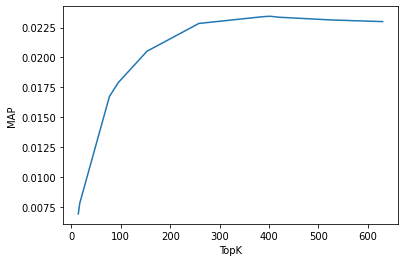

In [49]:
pyplot.plot(hyperparameter_search_rnd["k"].values, hyperparameter_search_rnd["MAP"].values) # Plot MAP/K graph
pyplot.ylabel('MAP')
pyplot.xlabel('TopK')
pyplot.show()

In [50]:
user_cf_best_k_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]

In [51]:
# Same procedure but with the shrink value
hyperparameter_search_rnd = pd.DataFrame(columns = ["k", "shrink", "MAP"])
hyperparameter_search_rnd["shrink"] = loguniform.rvs(0.1, 1000, size=11).astype(int)
hyperparameter_search_rnd = hyperparameter_search_rnd.sort_values(by="shrink")
hyperparameter_search_rnd["k"] = user_cf_best_k_value["k"]

for index in hyperparameter_search_rnd.index:

    recommender = UserKNNCFRecommender(urm_train)
    recommender.fit(shrink=hyperparameter_search_rnd.loc[index,"shrink"],
                    topK=hyperparameter_search_rnd.loc[index,"k"])

    result_df, _ = evaluator_validation.evaluateRecommender(recommender)

    hyperparameter_search_rnd.loc[index, "MAP"] = result_df.loc[10]["MAP"]

UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5454.81 column/sec. Elapsed time 2.32 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 11.44 sec. Users per second: 875
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5455.87 column/sec. Elapsed time 2.32 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 11.51 sec. Users per second: 869
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5546.07 column/sec. Elapsed time 2.28 sec
EvaluatorHoldout: Processed 10008 (100.0%) in 11.52 sec. Users per second: 869
UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFR

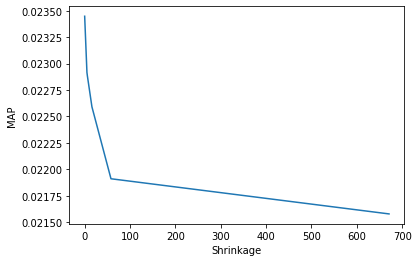

In [52]:
pyplot.plot(hyperparameter_search_rnd["shrink"].values, hyperparameter_search_rnd["MAP"].values)
pyplot.ylabel('MAP')
pyplot.xlabel('Shrinkage')
pyplot.show()

In [53]:
user_cf_best_k_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]['k']
user_cf_best_k_value

402

In [54]:
user_cf_best_shrink_value = hyperparameter_search_rnd.loc[hyperparameter_search_rnd["MAP"].astype(float).idxmax()]['shrink']
user_cf_best_shrink_value

0

# Alpha [Full Hybrid]

In [59]:
new_similarity = (1 - optuna_study_customCF.best_trial.params['alpha']) * itemKNNCF.W_sparse + optuna_study_customCF.best_trial.params['alpha'] * p3beta.W_sparse
itemknn_custom = ItemKNNCustomSimilarityRecommender(urm_train)
itemknn_custom.fit(new_similarity)

ItemKNNCustomSimilarityRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ItemKNNCustomSimilarityRecommender: URM Detected 344 ( 1.5%) items with no interactions.


In [58]:
userknn = UserKNNCFRecommender(urm_train)
userknn.fit(shrink=user_cf_best_shrink_value,
                topK=user_cf_best_k_value)

UserKNNCFRecommender: URM Detected 462 ( 3.7%) users with no interactions.
UserKNNCFRecommender: URM Detected 344 ( 1.5%) items with no interactions.
Similarity column 12638 (100.0%), 5471.71 column/sec. Elapsed time 2.31 sec


In [60]:
def objective_function_hybrid(optuna_trial):
    alpha = optuna_trial.suggest_float("alpha", 0.2, 0.8)
    
    recommender_instance = ScoresHybridRecommender(urm_train, itemknn_custom, userknn)
    recommender_instance.fit(alpha)

    result_df, _ = evaluator_validation.evaluateRecommender(recommender_instance)

    return result_df.loc[10]["MAP"]

In [61]:
optuna_study_hybrid = optuna.create_study(direction="maximize")

save_results_hybrid = SaveResults()

optuna_study_hybrid.optimize(objective_function_hybrid,
                      callbacks=[save_results_hybrid],
                      n_trials = 20)

[I 2023-11-30 15:19:19,502] A new study created in memory with name: no-name-5452b923-9d07-4180-89f0-ef0e696e581c


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.11 sec. Users per second: 709


[I 2023-11-30 15:19:33,646] Trial 0 finished with value: 0.02432356892263967 and parameters: {'alpha': 0.2654320273308662}. Best is trial 0 with value: 0.02432356892263967.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.00 sec. Users per second: 715


[I 2023-11-30 15:19:47,676] Trial 1 finished with value: 0.02450930525420934 and parameters: {'alpha': 0.3267247226243558}. Best is trial 1 with value: 0.02450930525420934.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.23 sec. Users per second: 703


[I 2023-11-30 15:20:01,929] Trial 2 finished with value: 0.0247164926788728 and parameters: {'alpha': 0.36930260914200763}. Best is trial 2 with value: 0.0247164926788728.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.00 sec. Users per second: 715


[I 2023-11-30 15:20:15,955] Trial 3 finished with value: 0.027853538597693475 and parameters: {'alpha': 0.7687338507435619}. Best is trial 3 with value: 0.027853538597693475.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.06 sec. Users per second: 712


[I 2023-11-30 15:20:30,037] Trial 4 finished with value: 0.024797927530991127 and parameters: {'alpha': 0.3898883476479059}. Best is trial 3 with value: 0.027853538597693475.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.07 sec. Users per second: 711


[I 2023-11-30 15:20:44,133] Trial 5 finished with value: 0.027100747973050256 and parameters: {'alpha': 0.6953439408524252}. Best is trial 3 with value: 0.027853538597693475.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.04 sec. Users per second: 713


[I 2023-11-30 15:20:58,195] Trial 6 finished with value: 0.026809818018601075 and parameters: {'alpha': 0.6650178722679807}. Best is trial 3 with value: 0.027853538597693475.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.99 sec. Users per second: 715


[I 2023-11-30 15:21:12,212] Trial 7 finished with value: 0.0279597948625229 and parameters: {'alpha': 0.7777063202585701}. Best is trial 7 with value: 0.0279597948625229.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.97 sec. Users per second: 716


[I 2023-11-30 15:21:26,206] Trial 8 finished with value: 0.02584319449202546 and parameters: {'alpha': 0.5625947814985729}. Best is trial 7 with value: 0.0279597948625229.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.90 sec. Users per second: 720


[I 2023-11-30 15:21:40,137] Trial 9 finished with value: 0.024842023206831397 and parameters: {'alpha': 0.4101300248627005}. Best is trial 7 with value: 0.0279597948625229.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.00 sec. Users per second: 715


[I 2023-11-30 15:21:54,169] Trial 10 finished with value: 0.02588310700645835 and parameters: {'alpha': 0.5669726115799243}. Best is trial 7 with value: 0.0279597948625229.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.06 sec. Users per second: 712


[I 2023-11-30 15:22:08,260] Trial 11 finished with value: 0.02821572900409855 and parameters: {'alpha': 0.798326158583829}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.98 sec. Users per second: 716


[I 2023-11-30 15:22:22,270] Trial 12 finished with value: 0.028086713169147428 and parameters: {'alpha': 0.7882667408213189}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.01 sec. Users per second: 714


[I 2023-11-30 15:22:36,313] Trial 13 finished with value: 0.02677503235506842 and parameters: {'alpha': 0.6631242994664618}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.95 sec. Users per second: 717


[I 2023-11-30 15:22:50,293] Trial 14 finished with value: 0.02812570974966081 and parameters: {'alpha': 0.7926767820308558}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.96 sec. Users per second: 717


[I 2023-11-30 15:23:04,280] Trial 15 finished with value: 0.025457522870592438 and parameters: {'alpha': 0.5208592168752624}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.90 sec. Users per second: 720


[I 2023-11-30 15:23:18,211] Trial 16 finished with value: 0.026399884061005185 and parameters: {'alpha': 0.6233633514994753}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.01 sec. Users per second: 714


[I 2023-11-30 15:23:32,256] Trial 17 finished with value: 0.027389497132452936 and parameters: {'alpha': 0.7267577424978344}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 13.98 sec. Users per second: 716


[I 2023-11-30 15:23:46,267] Trial 18 finished with value: 0.025120958788524755 and parameters: {'alpha': 0.4578190027715744}. Best is trial 11 with value: 0.02821572900409855.


ScoresHybridRecommender: URM Detected 462 ( 3.7%) users with no interactions.
ScoresHybridRecommender: URM Detected 344 ( 1.5%) items with no interactions.
EvaluatorHoldout: Processed 10008 (100.0%) in 14.03 sec. Users per second: 713


[I 2023-11-30 15:24:00,333] Trial 19 finished with value: 0.024085124757336998 and parameters: {'alpha': 0.20263645578993578}. Best is trial 11 with value: 0.02821572900409855.


In [62]:
pruned_trials = [t for t in optuna_study_hybrid.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in optuna_study_hybrid.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(optuna_study_hybrid.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
print("  Value Validation: ", optuna_study_hybrid.best_trial.value)

print("Best params:")
print(optuna_study_hybrid.best_trial.params)

Study statistics: 
  Number of finished trials:  20
  Number of pruned trials:  0
  Number of complete trials:  20
Best trial:
  Value Validation:  0.02821572900409855
Best params:
{'alpha': 0.798326158583829}


# Model Evaluation

In [67]:
hybrid = ScoresHybridRecommender(URM_train=urm_train+urm_validation, recommender_1=itemknn_custom, recommender_2=userknn)
hybrid.fit(alpha=optuna_study_hybrid.best_trial.params['alpha']) # TODO fix here if change fit function

ScoresHybridRecommender: URM Detected 240 ( 1.9%) users with no interactions.
ScoresHybridRecommender: URM Detected 123 ( 0.6%) items with no interactions.


In [68]:
result_df, _ = evaluator_test.evaluateRecommender(hybrid)
result_df

EvaluatorHoldout: Processed 10511 (100.0%) in 14.72 sec. Users per second: 714


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.078194,0.133347,0.111098,0.039091,0.065483,0.227507,0.121836,0.091787,0.454096,0.2945,...,0.831698,0.377671,0.831698,0.032856,8.701137,0.990401,0.09423,0.670241,2.985555,0.266147
